## Dataset Description

The competition dataset comprises about 10,000 essays, some written by students and some generated by a variety of large language models (LLMs). The goal of the competition is to determine whether or not essay was generated by an LLM.  

All of the essays were written in response to one of seven essay prompts. In each prompt, the students were instructed to read one or more source texts and then write a response. This same information may or may not have been provided as input to an LLM when generating an essay.  

Essays from two of the prompts compose the training set; the remaining essays compose the hidden test set. Nearly all of the training set essays were written by students, with only a few generated essays given as examples. You may wish to generate more essays to use as training data.  

Please note that this is a Code Competition. The data in test_essays.csv is only dummy data to help you author your solutions. When your submission is scored, this example test data will be replaced with the full test set. There are about 9,000 essays in the test set, both student written and LLM generated.  

## File and Field Information

- {test|train}_essays.csv  

`id` - A unique identifier for each essay.
`prompt_id` - Identifies the prompt the essay was written in response to.
`text` - The essay text itself.
`generated` - Whether the essay was written by a student (0) or generated by an LLM (1). This field is the target and is not present in `test_essays.csv`.  
- train_prompts.csv - Essays were written in response to information in these fields.  

`prompt_id` - A unique identifier for each prompt.
`prompt_name` - The title of the prompt.
`instructions` - The instructions given to students.
`source_text` - The text of the article(s) the essays were written in response to, in Markdown format. Significant paragraphs are enumerated by a numeral preceding the paragraph on the same line, as in 0 Paragraph one.\n\n1 Paragraph two.. Essays sometimes refer to a paragraph by its numeral. Each article is preceded with its title in a heading, like # Title. When an author is indicated, their name will be given in the title after by. Not all articles have authors indicated. An article may have subheadings indicated like `## Subheading`.  
- sample_submission.csv - A submission file in the correct format. See the Evaluation page for details.

In [1]:
!pip install pandas numpy matplotlib seaborn

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from collections import Counter
import itertools

DATA_PATH = './llm-detect-ai-generated-text'

train_essays = pd.read_csv(f'{DATA_PATH}/train_essays.csv')
train_prompts = pd.read_csv(f'{DATA_PATH}/train_prompts.csv')
test_essays = pd.read_csv(f'{DATA_PATH}/test_essays.csv')
sample_submit = pd.read_csv(f'{DATA_PATH}/sample_submission.csv')

In [3]:
train_essays.shape, train_prompts.shape, test_essays.shape

((1378, 4), (2, 4), (3, 3))

In [4]:
train_essays.head(1)

,id,prompt_id,text,generated
0,0059830c,0,Cars. Cars have been around since they became ...,0


In [5]:
train_prompts

,prompt_id,prompt_name,instructions,source_text
0,0,Car-free cities,Write an explanatory essay to inform fellow ci...,"# In German Suburb, Life Goes On Without Cars ..."
1,1,Does the electoral college work?,Write a letter to your state senator in which ...,# What Is the Electoral College? by the Office...


In [6]:
train_prompts['source_text'].iloc[0]

'# In German Suburb, Life Goes On Without Cars by Elisabeth Rosenthal\n\n1 VAUBAN, Germany—Residents of this upscale community are suburban pioneers, going where few soccer moms or commuting executives have ever gone before: they have given up their cars.\n\n2 Street parking, driveways and home garages are generally forbidden in this experimental new district on the outskirts of Freiburg, near the French and Swiss borders. Vauban’s streets are completely “car-free”—except the main thoroughfare, where the tram to downtown Freiburg runs, and a few streets on one edge of the community. Car ownership is allowed, but there are only two places to park—large garages at the edge of the development, where a car-owner buys a space, for $40,000, along with a home.\n\n3 As a result, 70 percent of Vauban’s families do not own cars, and 57 percent sold a car to move here. “When I had a car I was always tense. I’m much happier this way,” said Heidrun Walter, a media trainer and mother of two, as she 

In [7]:
train_essays = pd.merge(train_prompts, train_essays, on='prompt_id', how='right')
train_essays.head(1)

,prompt_id,prompt_name,instructions,source_text,id,text,generated
0,0,Car-free cities,Write an explanatory essay to inform fellow ci...,"# In German Suburb, Life Goes On Without Cars ...",0059830c,Cars. Cars have been around since they became ...,0


In [11]:
train_essays.head(10)

,prompt_id,prompt_name,instructions,source_text,id,text,generated
0,0,Car-free cities,Write an explanatory essay to inform fellow ci...,"# In German Suburb, Life Goes On Without Cars ...",0059830c,Cars. Cars have been around since they became ...,0
1,0,Car-free cities,Write an explanatory essay to inform fellow ci...,"# In German Suburb, Life Goes On Without Cars ...",005db917,Transportation is a large necessity in most co...,0
2,0,Car-free cities,Write an explanatory essay to inform fellow ci...,"# In German Suburb, Life Goes On Without Cars ...",008f63e3,"""America's love affair with it's vehicles seem...",0
3,0,Car-free cities,Write an explanatory essay to inform fellow ci...,"# In German Suburb, Life Goes On Without Cars ...",00940276,How often do you ride in a car? Do you drive a...,0
4,0,Car-free cities,Write an explanatory essay to inform fellow ci...,"# In German Suburb, Life Goes On Without Cars ...",00c39458,Cars are a wonderful thing. They are perhaps o...,0
5,1,Does the electoral college work?,Write a letter to your state senator in which ...,# What Is the Electoral College? by the Office...,00da8c32,The electrol college system is an unfair syste...,0
6,1,Does the electoral college work?,Write a letter to your state senator in which ...,# What Is the Electoral College? by the Office...,011dc2bc,"Dear state senator, It is the utmost respect t...",0
7,0,Car-free cities,Write an explanatory essay to inform fellow ci...,"# In German Suburb, Life Goes On Without Cars ...",01448434,"Fellow citizens, cars have become a major role...",0
8,1,Does the electoral college work?,Write a letter to your state senator in which ...,# What Is the Electoral College? by the Office...,01c6e176,"""It's official: The electoral college is unfai...",0
9,1,Does the electoral college work?,Write a letter to your state senator in which ...,# What Is the Electoral College? by the Office...,0202ddf9,The Electoral College has been kept for centur...,0


In [8]:
test_essays = pd.merge(train_prompts, test_essays, on='prompt_id', how='right')
test_essays.head(1)

,prompt_id,prompt_name,instructions,source_text,id,text
0,2,NaN,NaN,NaN,0000aaaa,Aaa bbb ccc.


In [9]:
train_essays['generated'].value_counts()

generated
0    1375
1       3
Name: count, dtype: int64

In [10]:
train_essays['generated']

0       0
1       0
2       0
3       0
4       0
       ..
1373    0
1374    0
1375    0
1376    0
1377    0
Name: generated, Length: 1378, dtype: int64

## Distribution of Essay Lengths

In [12]:
# Calculate the length of each essay and create a new column
train_essays['essay_length'] = train_essays['text'].apply(len)

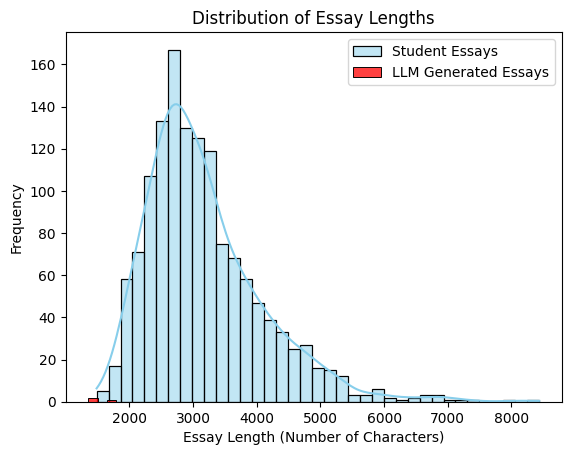

In [17]:
# Distribution of essay lengths for student essays
sns.histplot(train_essays[train_essays['generated'] == 0]['essay_length'], color='skyblue', label='Student Essays', kde=True)

# Distribution of essay lengths for LLM generated essays
sns.histplot(train_essays[train_essays['generated'] == 1]['essay_length'], color='red', label='LLM Generated Essays')

plt.title('Distribution of Essay Lengths')
plt.xlabel('Essay Length (Number of Characters)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

## Comparison of Essay Lengths by Source

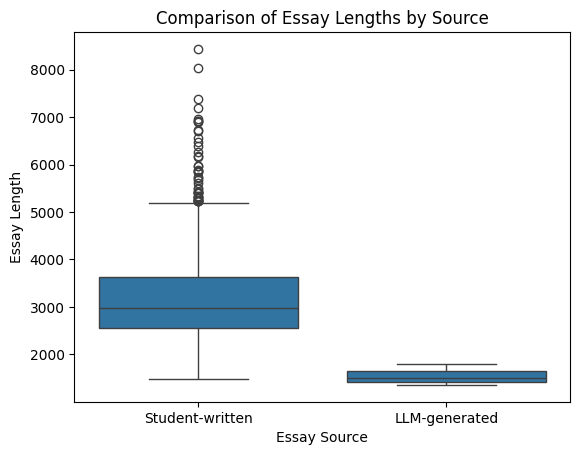

In [19]:
sns.boxplot(x='generated', y='essay_length', data=train_essays)
plt.title('Comparison of Essay Lengths by Source')
plt.xlabel('Essay Source')
plt.ylabel('Essay Length')
plt.xticks([0, 1], ['Student-written', 'LLM-generated'])
plt.show()

In [21]:
def calculate_text_metrics_simple(text):
    words = text.split()
    sentences = text.split('.')
    word_count = len(words)
    unique_word_count = len(set(words))
    sentence_count = len(sentences)
    avg_word_length = sum(len(word) for word in words) / word_count if word_count > 0 else 0
    return word_count, unique_word_count, sentence_count, avg_word_length

# Apply the function to the 'text' column
train_essays['metrics'] = train_essays['text'].apply(calculate_text_metrics_simple)

# Expand the 'metrics' column into separate columns
train_essays[
    ['word_count', 'unique_word_count', 'sentence_count', 'avg_word_length']
] = pd.DataFrame(train_essays['metrics'].tolist(), index=train_essays.index)

# Drop the 'metrics' column as it's no longer needed
train_essays.drop('metrics', axis=1, inplace=True)

# Group by 'generated' to compare these metrics between student-written and LLM_generated essays
comparison_metrics = train_essays.groupby('generated')[
    ['word_count', 'unique_word_count', 'sentence_count', 'avg_word_length']
].mean()
comparison_metrics

,word_count,unique_word_count,sentence_count,avg_word_length
generated,,,,
0,556.768727,275.334545,30.063273,4.694868
1,260.666667,146.333333,13.000000,4.935610


In [24]:
train_essays.index

RangeIndex(start=0, stop=1378, step=1)

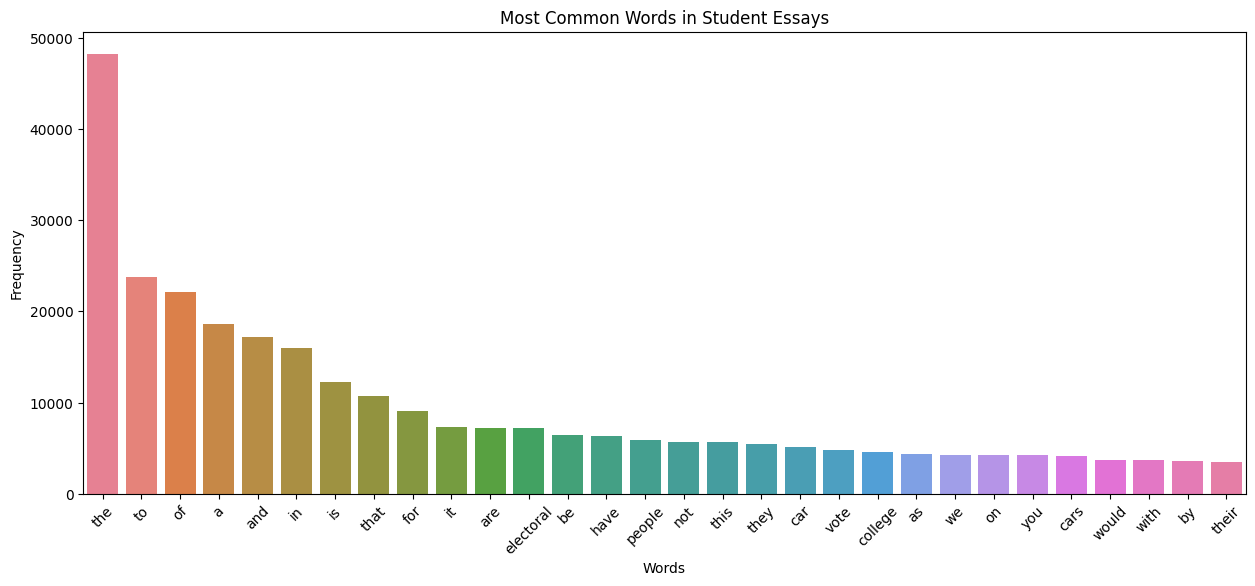

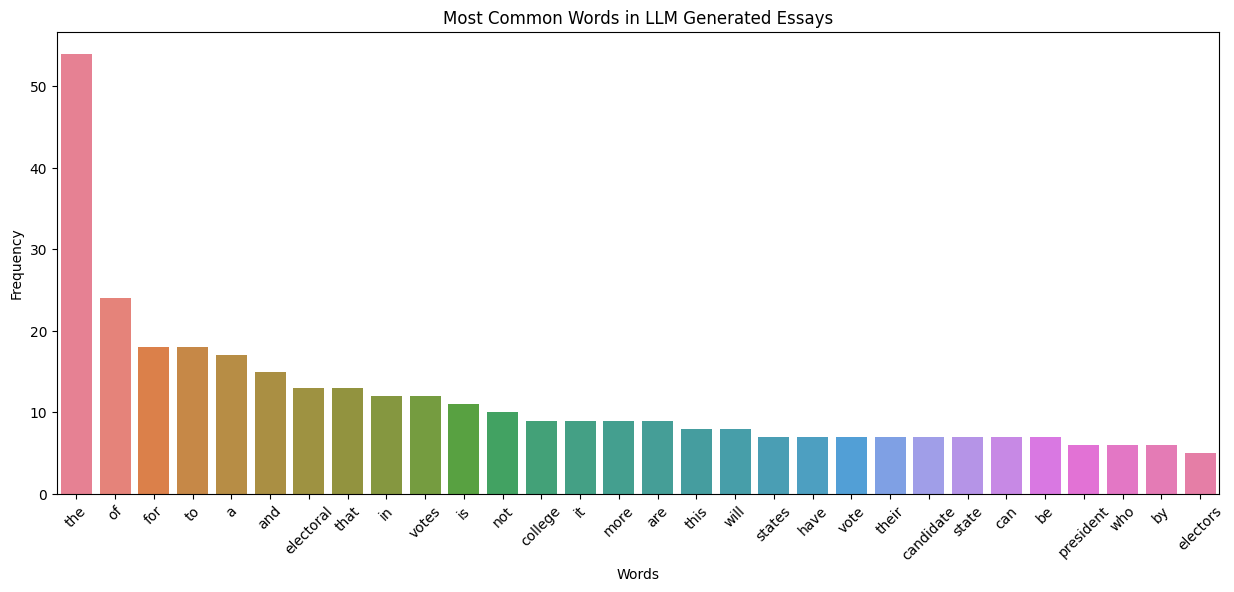

In [30]:
def plot_most_common_words(text_series, num_words=30, title="Most Common Words"):
    all_text = ' '.join(text_series).lower()
    # print('-----------------all text-------------', all_text)
    words = all_text.split()
    # print('-----------------words-------------', words)
    word_freq = Counter(words)
    # print('-----------------word_freq-------------', word_freq  )
    common_words = word_freq.most_common(num_words)
    # print('-----------------common_words-------------', common_words)
    
    # Plot the most common words
    plt.figure(figsize=(15, 6))
    sns.barplot(x=[word for word, freq in common_words], y=[freq for word, freq in common_words], hue=[word for word, freq in common_words])
    plt.title(title)
    plt.xticks(rotation=45)
    plt.xlabel('Words')
    plt.ylabel('Frequency')
    plt.show()
    
plot_most_common_words(train_essays[train_essays['generated'] == 0]['text'], title="Most Common Words in Student Essays")
plot_most_common_words(train_essays[train_essays['generated'] == 1]['text'], title="Most Common Words in LLM Generated Essays")